In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline  
data=pd.read_csv("dataset/up_data.csv")
data.shape

(65, 3)

In [3]:
y=data['2'] # length
x=data["3"] # Resistance
x1=[]
y1=[]
x2=[]
x3=[]
for i in range(64):
    x1.append(x[i])
    y1.append(y[i])
    x2.append((x[i]**2)*0.0001) # 2차 함수 : 0.0001
    x3.append((x[i]**3)*0.00000001)
W1=tf.Variable(tf.random_normal([1]),name='weight1')
W2=tf.Variable(tf.random_normal([1]),name='weight2')
W3=tf.Variable(tf.random_normal([1]),name='weight3')
B=tf.Variable(tf.random_normal([1]),name='bias')
X1=tf.placeholder(tf.float32)
X2=tf.placeholder(tf.float32)
X3=tf.placeholder(tf.float32)
Y=tf.placeholder(tf.float32)

In [4]:
hypothesis=B+X1*W1+X2*W2
cost=tf.reduce_mean(tf.square(hypothesis-Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.000000001) # 2차 함수 : 0.000000001
train=optimizer.minimize(cost)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

In [5]:
for step in range(5000):
    cost_val, hy_val, _,w1,b = sess.run([cost, hypothesis, train,W1,B],
                                   feed_dict={X1:x1,X2:x2, Y:y1})
    if step % 500 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val,"\nW1:{},B:{}".format(w1,b))

0 Cost:  627194500.0 
Prediction:
 [ 1305.2914  1317.1542  1317.1542  1317.1542  1305.2914  1317.1542
  1329.0803  1317.1542  1714.0098  2422.212   3245.1514  4241.9224
  5039.126   6002.372   6843.949   7798.209   8727.355   9482.979
 10429.772  11339.609  12186.825  13102.793  14094.52   15169.932
 16036.74   16749.615  17831.355  18636.207  19607.822  20506.42
 21315.1    22161.443  22747.676  23199.412  24784.117  25453.955
 25796.996  27042.195  26679.191  28360.693  29350.375  29964.373
 30594.105  28751.62   31680.078  32354.404  32813.77   33756.844
 36265.438  35235.16   35235.16   35745.67   36265.438  36528.844
 37062.812  37882.168  38160.332  38160.332  39010.203  39010.203
 39298.73   39589.953  39883.89   40180.56  ] 
W1:[0.607165],B:[1.7157669]
500 Cost:  4.345045 
Prediction:
 [2.4477186 2.4529667 2.4529667 2.4529667 2.4477186 2.4529667 2.4582248
 2.4529667 2.6188023 2.8758576 3.1275537 3.3828802 3.5572612 3.7401333
 3.8793917 4.01801   4.136202  4.2217226 4.3170733 4.

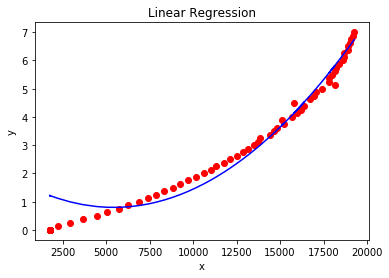

In [9]:
# W1:[0.00016793],B:[-0.88223064]

plt.figure(1)
plt.title('Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
# 주어진 데이터들을 점으로 표시
plt.plot(x1,y1, 'ro')
# 예측한 일차함수를 직선으로 표시
plt.plot(x1,sess.run(B)+x1*sess.run(W1)+x2*sess.run(W2), 'b')
# X=5 일때의 계산 값
plt.show()